# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

# Collection of Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\ML_project\application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# EDA

In [3]:
# Dataset contains 307511 rows and 122 columns.
df.shape

(307511, 122)

In [4]:
# Dataset is imbalance. It has 8% of 1 class(Those customer who default their loan) and 92% of 0 class(Those customer who pay 
# their loan.
df["TARGET"].value_counts()/df.shape[0]*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [5]:
# There are 40 features in the dataset which are int64 datatype.
print(df.dtypes[df.dtypes=='int64'].shape)
list_of_int = df.dtypes[df.dtypes=='int64'].index.to_list()
list_of_int

(41,)


['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [6]:
# There are 20 features in the dataset which are float datatype.
print(df.dtypes[df.dtypes=='float'].shape)
list_of_float = df.dtypes[df.dtypes=='float'].index.to_list()
list_of_float

(65,)


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [7]:
# There are 16 features in the dataset which are object dtype.
print(df.dtypes[df.dtypes=='object'].shape)
list_of_object = df.dtypes[df.dtypes=='object'].index.to_list()
list_of_object

(16,)


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

# pdf plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` i

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

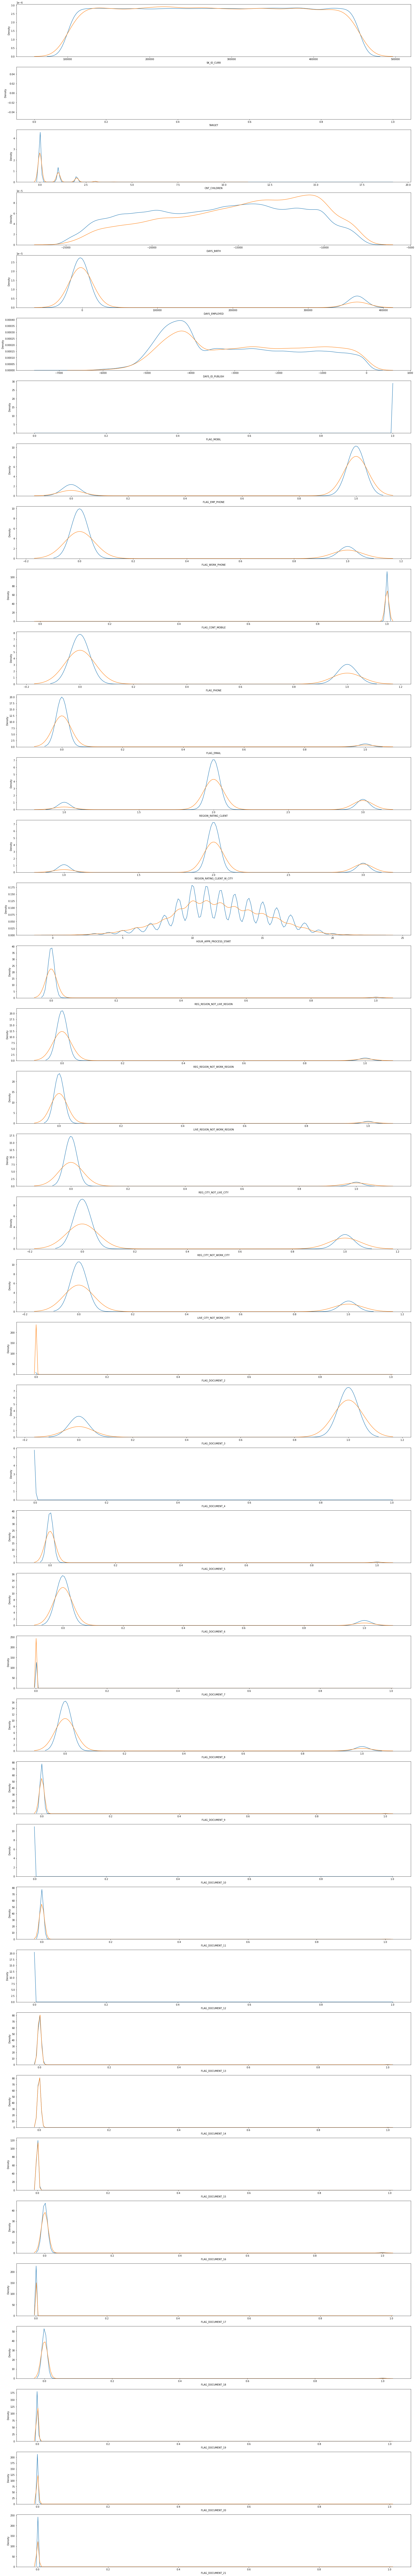

In [8]:
def obj(list_of_int):
    plt.figure(figsize = (30,200))
    for i in range(1,int(len(list_of_int))+1):
        plt.subplot(int(len(list_of_int)),1,i)
        sns.distplot(df[list_of_int[i-1]][df["TARGET"]==0],hist=False)
        sns.distplot(df[list_of_int[i-1]][df["TARGET"]==1],hist=False)
obj(list_of_int)

Conclusion:

1)Those customer who are younger than 15000 days have more probability to default their loan than older customers.

2)Flag_mobile have all the data values = 1, thus this feature has no use.

3)Most of the Flag_documents have no use, beacuse it has only one category either 0 or 1.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

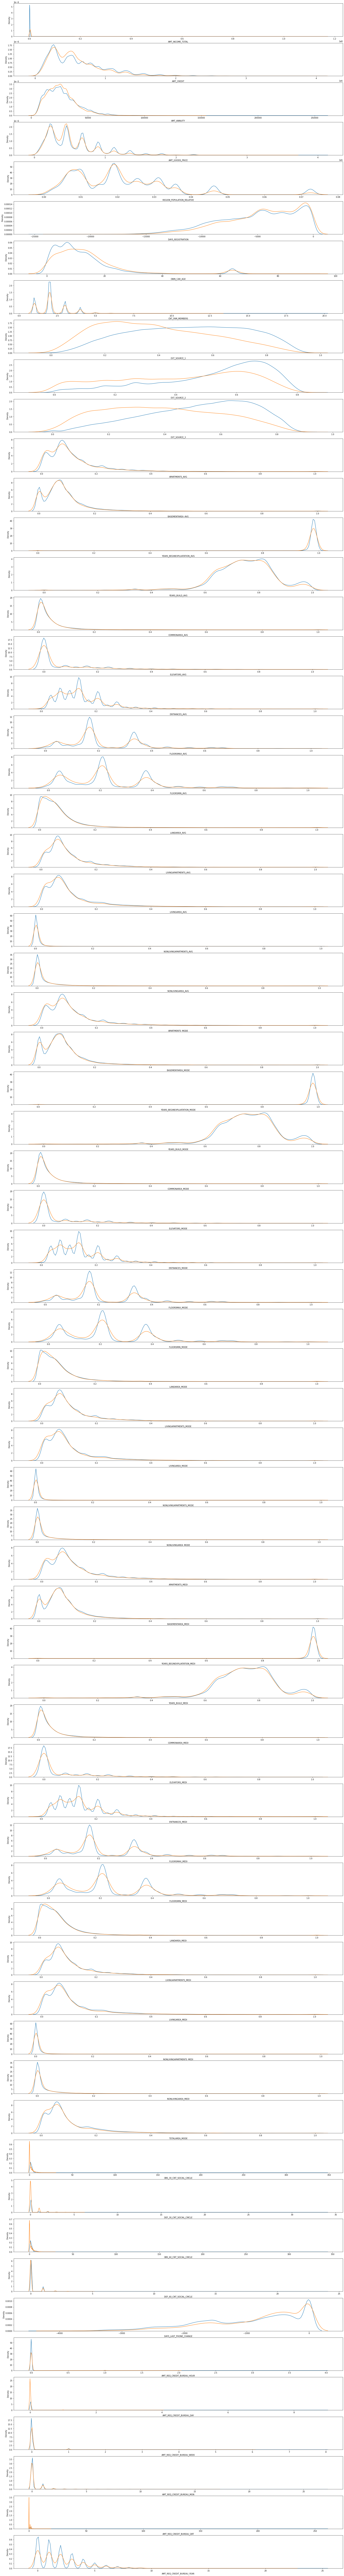

In [9]:
def obj(list_of_float):
    plt.figure(figsize = (30,240))
    for i in range(1,int(len(list_of_float))+1):
        plt.subplot(int(len(list_of_float)),1,i)
        sns.distplot(df[list_of_float[i-1]][df["TARGET"]==0],hist=False)
        sns.distplot(df[list_of_float[i-1]][df["TARGET"]==1],hist=False)
obj(list_of_float)

Conclusion:

1)Customeres who pay their loan has lower median age of cars than customers who default their loan.

2)customers have EXT_SOURCE_1 value less than 0.45 has more chance to default their loan than customer have EXT_SOURCE_1 value more than 0.45.

3)similar with EXT_SOURCE_2 and EXT_SOURCE_3.

4)Most of the features are right skewed.

# Countplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                   0      1
NAME_CONTRACT_TYPE               
Cash loans          255011  23221
Revolving loans      27675   1604 

percentage of default in the loan 
 NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET            0      1
CODE_GENDER               
F            188278  14170
M             94404  10655
XNA               4      0 

percentage of default in the loan 
 CODE_GENDER
M      10.141920
F       6.999328
XNA     0.000000
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET             0      1
FLAG_OWN_CAR               
N             185675  17249
Y              97011   7576 

percentage of default in the loan 
 FLAG_OWN_CAR
N    8.500227
Y    7.243730
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                0      1
FLAG_OWN_REALTY               
N                 86357   7842
Y                196329  16983 

percentage of default in the loan 
 FLAG_OWN_REALTY
N    8.324929
Y    7.961577
Name: TARGET, dtype: float64 

TARGET                0      1
NAME_TYPE_SUITE               
Children           3026    241
Family            37140   3009
Group of people     248     23
Other_A             790     76
Other_B            1596    174
Spouse, partner   10475    895
Unaccompanied    228189  20337

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 

percentage of default in the loan 
 NAME_TYPE_SUITE
Other_B            9.830508
Other_A            8.775982
Group of people    8.487085
Unaccompanied      8.183047
Spouse, partner    7.871592
Family             7.494583
Children           7.376798
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                     0      1
NAME_INCOME_TYPE                   
Businessman               10      0
Commercial associate   66257   5360
Maternity leave            3      2
Pensioner              52380   2982
State servant          20454   1249
Student                   18      0
Unemployed                14      8
Working               143550  15224 

percentage of default in the loan 
 NAME_INCOME_TYPE
Maternity leave         40.000000
Unemployed              36.363636
Working                  9.588472
Commercial associate     7.484257
State servant            5.754965
Pensioner                5.386366
Student                  0.000000
Businessman              0.000000
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                              0      1
NAME_EDUCATION_TYPE                         
Academic degree                   161      3
Higher education                70854   4009
Incomplete higher                9405    872
Lower secondary                  3399    417
Secondary / secondary special  198867  19524 

percentage of default in the loan 
 NAME_EDUCATION_TYPE
Lower secondary                  10.927673
Secondary / secondary special     8.939929
Incomplete higher                 8.484966
Higher education                  5.355115
Academic degree                   1.829268
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                     0      1
NAME_FAMILY_STATUS                 
Civil marriage         26814   2961
Married               181582  14850
Separated              18150   1620
Single / not married   40987   4457
Unknown                    2      0
Widow                  15151    937 

percentage of default in the loan 
 NAME_FAMILY_STATUS
Civil marriage          9.944584
Single / not married    9.807675
Separated               8.194234
Married                 7.559868
Widow                   5.824217
Unknown                 0.000000
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                    0      1
NAME_HOUSING_TYPE                 
Co-op apartment        1033     89
House / apartment    251596  21272
Municipal apartment   10228    955
Office apartment       2445    172
Rented apartment       4280    601
With parents          13104   1736 

percentage of default in the loan 
 NAME_HOUSING_TYPE
Rented apartment       12.313051
With parents           11.698113
Municipal apartment     8.539748
Co-op apartment         7.932264
House / apartment       7.795711
Office apartment        6.572411
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                     0     1
OCCUPATION_TYPE                   
Accountants             9339   474
Cleaning staff          4206   447
Cooking staff           5325   621
Core staff             25832  1738
Drivers                16496  2107
HR staff                 527    36
High skill tech staff  10679   701
IT staff                 492    34
Laborers               49348  5838
Low-skill Laborers      1734   359
Managers               20043  1328
Medicine staff          7965   572
Private service staff   2477   175
Realty agents            692    59
Sales staff            29010  3092
Secretaries             1213    92
Security staff          5999   722
Waiters/barmen staff    1196   152 

percentage of default in the loan 
 OCCUPATION_TYPE
Low-skill Laborers       17.152413
Drivers                  11.326130
Waiters/barmen staff     11.275964
Security staff           10.742449
Laborers                 10.578770
Cooking staff            10.443996
Sales staff               9.631799
C

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                          0     1
WEEKDAY_APPR_PROCESS_START             
FRIDAY                      46237  4101
MONDAY                      46780  3934
SATURDAY                    31182  2670
SUNDAY                      14898  1283
THURSDAY                    46493  4098
TUESDAY                     49400  4501
WEDNESDAY                   47696  4238 

percentage of default in the loan 
 WEEKDAY_APPR_PROCESS_START
TUESDAY      8.350494
WEDNESDAY    8.160357
FRIDAY       8.146927
THURSDAY     8.100255
SUNDAY       7.929053
SATURDAY     7.887274
MONDAY       7.757227
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                      0     1
ORGANIZATION_TYPE                  
Advertising               394    35
Agriculture              2197   257
Bank                     2377   130
Business Entity Type 1   5497   487
Business Entity Type 2   9653   900
Business Entity Type 3  61669  6323
Cleaning                  231    29
Construction             5936   785
Culture                   358    21
Electricity               887    63
Emergency                 520    40
Government               9678   726
Hotel                     904    62
Housing                  2723   235
Industry: type 1          924   115
Industry: type 10         102     7
Industry: type 11        2470   234
Industry: type 12         355    14
Industry: type 13          58     9
Industry: type 2          425    33
Industry: type 3         2930   348
Industry: type 4          788    89
Industry: type 5          558    41
Industry: type 6          104     8
Industry: type 7         1202   105
Industry: type 8           2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


percentage of default in the loan 
 FONDKAPREMONT_MODE
not specified            7.543520
reg oper account         6.978193
reg oper spec account    6.556291
org spec account         5.819541
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                 0      1
HOUSETYPE_MODE                 
block of flats    140053  10450
specific housing    1347    152
terraced house      1109    103 

percentage of default in the loan 
 HOUSETYPE_MODE
specific housing    10.140093
terraced house       8.498350
block of flats       6.943383
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                  0     1
WALLSMATERIAL_MODE             
Block                8603   650
Mixed                2123   173
Monolithic           1695    84
Others               1490   135
Panel               61848  4192
Stone, brick        60015  4800
Wooden               4842   520 

percentage of default in the loan 
 WALLSMATERIAL_MODE
Wooden          9.697874
Others          8.307692
Mixed           7.534843
Stone, brick    7.405693
Block           7.024749
Panel           6.347668
Monolithic      4.721754
Name: TARGET, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TARGET                    0      1
EMERGENCYSTATE_MODE               
No                   148324  11104
Yes                    2105    223 

percentage of default in the loan 
 EMERGENCYSTATE_MODE
Yes    9.579038
No     6.964900
Name: TARGET, dtype: float64 



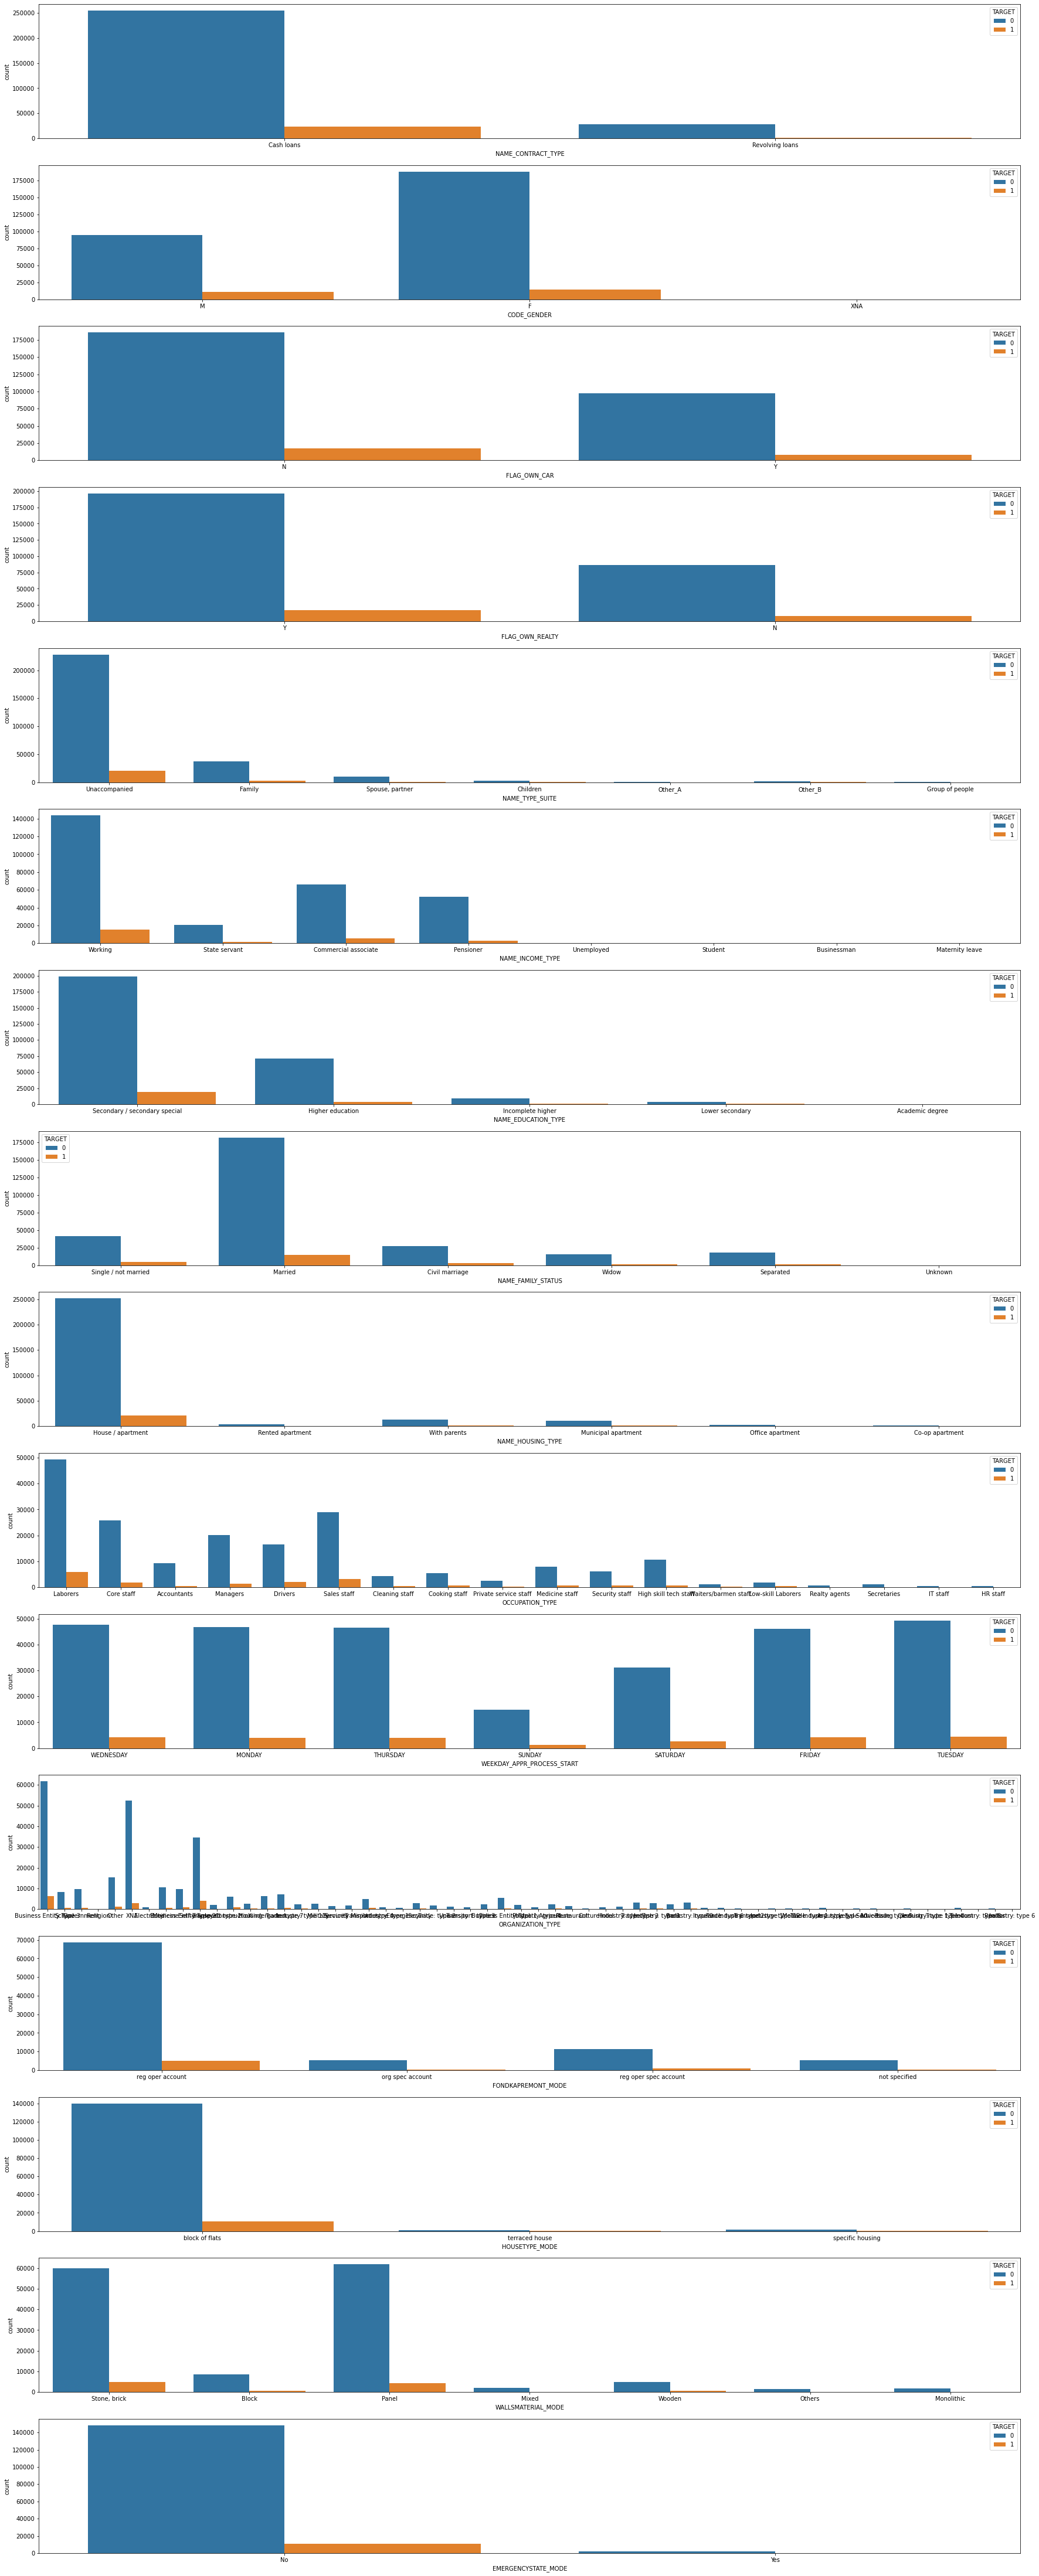

In [10]:
plt.figure(figsize = (30,80))
for i in range(1,int(len(list_of_object))+1):
    plt.subplot(int(len(list_of_object)),1,i)
    sns.countplot(list_of_object[i-1],hue="TARGET",data=df)
    print(pd.crosstab(df[list_of_object[i-1]],df["TARGET"]),'\n')
    print("percentage of default in the loan",'\n',df.groupby(list_of_object[i-1]).mean()["TARGET"].sort_values(ascending=False)*100,'\n')


from above Countplot we conclude that:

1)Percentage of default loan is more when customer applies for "Cash loans" than "Revolving loans"

2)Male customer has more probability to deafault their loan.And no any not-specified gender has default their loan yet.

3)In the NAME_TYPE_SUITE, Family and children category has least probabilty to default their loan.

4)Those Female which are on Maternity leave and Unemployed customer has 40 and 36 percentage probabilty to default their loan, where the bussiness man and students has 0 percentage chance to default their loan.

5)Those customer which has higher degree has least probabilty and those customer which are just secondry school education has heighest probabilty to default their loan.

6)Those customer who live in Rented appartment and live with their parents have high chance to defualt the loan.

7)In Occupation type like Driver, Labour,witer,security staff has very high chance to default their loan.

8)where Acountants, HR , IT staff has very little chance to default their loan.

9)Those customer who wants the loan in Emergency has higher chance to default their loan.

# HeatMap

<AxesSubplot:>

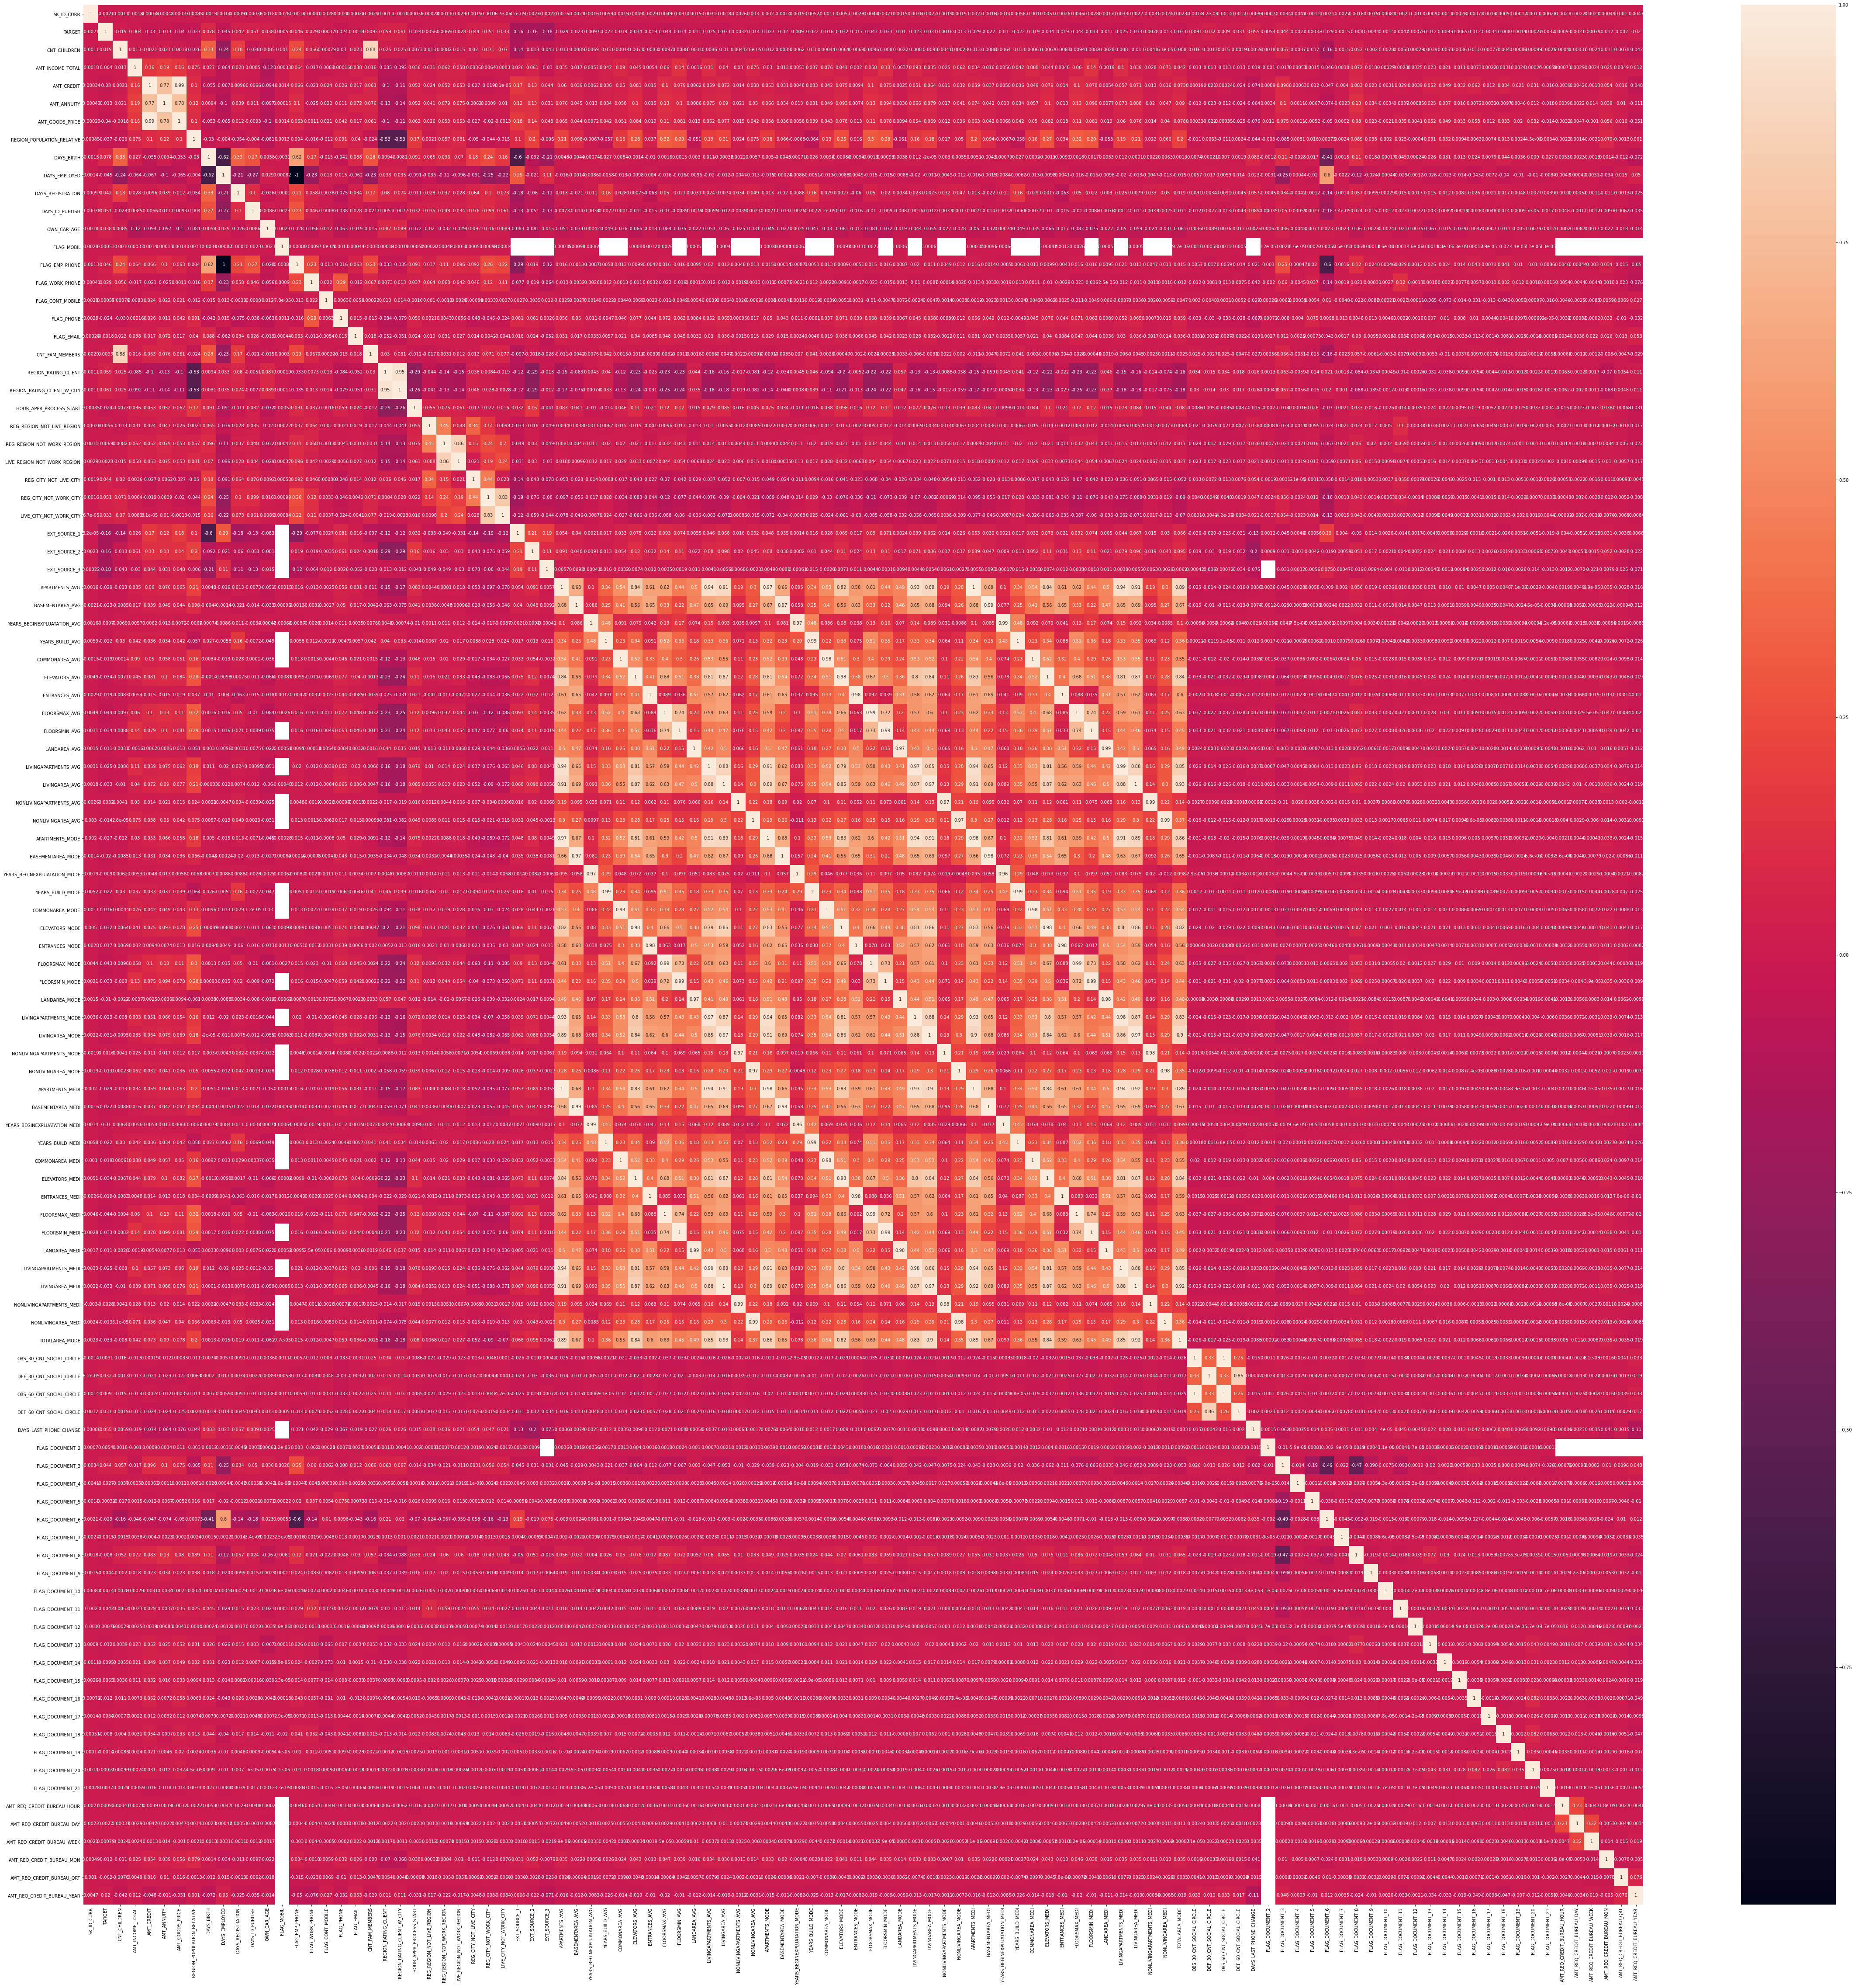

In [11]:
plt.figure(figsize=(80,80))
sns.heatmap(df[df.columns.to_list()].corr(),annot=True)

# Feature Engineering and Feature Selection

Droping Feature because it has high pearson coorelation coeficient

In [12]:
df.drop(['AMT_CREDIT','REGION_RATING_CLIENT_W_CITY','FLAG_EMP_PHONE','CNT_CHILDREN'],axis=1,inplace=True)

In [13]:
df.drop(['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

Drping some more features

In [14]:
df.drop(['AMT_REQ_CREDIT_BUREAU_HOUR',    
'AMT_REQ_CREDIT_BUREAU_DAY',     
'AMT_REQ_CREDIT_BUREAU_WEEK',    
'AMT_REQ_CREDIT_BUREAU_MON',     
'AMT_REQ_CREDIT_BUREAU_QRT',     
'AMT_REQ_CREDIT_BUREAU_YEAR','SK_ID_CURR'],axis=1,inplace=True)

# Filling Missing Values

In [15]:
df[['EMERGENCYSTATE_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','FONDKAPREMONT_MODE','OCCUPATION_TYPE']] = df[['EMERGENCYSTATE_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','FONDKAPREMONT_MODE','OCCUPATION_TYPE']].fillna("Missing",axis=0)
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0            1         Cash loans           M            N               Y   
1            0         Cash loans           F            N               N   
2            0    Revolving loans           M            Y               Y   
3            0         Cash loans           F            N               Y   
4            0         Cash loans           M            N               Y   
...        ...                ...         ...          ...             ...   
307506       0         Cash loans           M            N               N   
307507       0         Cash loans           F            N               Y   
307508       0         Cash loans           F            N               Y   
307509       1         Cash loans           F            N               Y   
307510       0         Cash loans           F            N               N   

        AMT_INCOME_TOTAL  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0               202500.0      24700.5         351000.0   Unaccompanied   
1               270000.0      35698.5        1129500.0          Family   
2                67500.0       6750.0         135000.0   Unaccompanied   
3               135000.0      29686.5         297000.0   Unaccompanied   
4               121500.0      21865.5         513000.0   Unaccompanied   
...                  ...          ...              ...             ...   
307506          157500.0      27558.0         225000.0   Unaccompanied   
307507           72000.0      12001.5         225000.0   Unaccompanied   
307508          153000.0      29979.0         585000.0   Unaccompanied   
307509          171000.0      20205.0         319500.0   Unaccompanied   
307510          157500.0      49117.5         675000.0   Unaccompanied   

            NAME_INCOME_TYPE  ... FLAG_DOCUMENT_12 FLAG_DOCUMENT_13  \
0                    Working  ...                0                0   
1              State servant  ...                0                0   
2                    Working  ...                0                0   
3                    Working  ...                0                0   
4                    Working  ...                0                0   
...                      ...  ...              ...              ...   
307506               Working  ...                0                0   
307507             Pensioner  ...                0                0   
307508               Working  ...                0                0   
307509  Commercial associate  ...                0                0   
307510  Commercial associate  ...                0                0   

       FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 0   
...                 ...               ...               ...               ...   
307506                0                 0                 0                 0   
307507                0                 0                 0                 0   
307508                0                 0                 0                 0   
307509                0                 0                 0                 0   
307510                0                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0                 0  
1                      0                 0                 0                 0  
2                      0                 0                 0                 0  
3                      0        

In [16]:
df["OWN_CAR_AGE"] = df["OWN_CAR_AGE"].fillna(-1,axis=0)

In [17]:
df.loc[(df["EXT_SOURCE_1"].isna()) & (df["TARGET"]==0),["EXT_SOURCE_1"]] =0.517337
df.loc[(df["EXT_SOURCE_1"].isna()) & (df["TARGET"]==1),["EXT_SOURCE_1"]] = 0.361343

In [18]:
df.loc[(df["EXT_SOURCE_3"].isna()) & (df["TARGET"]==0),["EXT_SOURCE_3"]] =0.546023
df.loc[(df["EXT_SOURCE_3"].isna()) & (df["TARGET"]==1),["EXT_SOURCE_3"]] =0.379100

In [19]:
cols = [col for col in df.columns if df[col].isna().mean()<0.05 and df[col].isna().mean()>0]
cols

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [20]:
new_df = df[cols].dropna()
ind = new_df.index

In [21]:
df = df.iloc[ind,:]
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0            1         Cash loans           M            N               Y   
1            0         Cash loans           F            N               N   
2            0    Revolving loans           M            Y               Y   
3            0         Cash loans           F            N               Y   
4            0         Cash loans           M            N               Y   
...        ...                ...         ...          ...             ...   
307506       0         Cash loans           M            N               N   
307507       0         Cash loans           F            N               Y   
307508       0         Cash loans           F            N               Y   
307509       1         Cash loans           F            N               Y   
307510       0         Cash loans           F            N               N   

        AMT_INCOME_TOTAL  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0               202500.0      24700.5         351000.0   Unaccompanied   
1               270000.0      35698.5        1129500.0          Family   
2                67500.0       6750.0         135000.0   Unaccompanied   
3               135000.0      29686.5         297000.0   Unaccompanied   
4               121500.0      21865.5         513000.0   Unaccompanied   
...                  ...          ...              ...             ...   
307506          157500.0      27558.0         225000.0   Unaccompanied   
307507           72000.0      12001.5         225000.0   Unaccompanied   
307508          153000.0      29979.0         585000.0   Unaccompanied   
307509          171000.0      20205.0         319500.0   Unaccompanied   
307510          157500.0      49117.5         675000.0   Unaccompanied   

            NAME_INCOME_TYPE  ... FLAG_DOCUMENT_12 FLAG_DOCUMENT_13  \
0                    Working  ...                0                0   
1              State servant  ...                0                0   
2                    Working  ...                0                0   
3                    Working  ...                0                0   
4                    Working  ...                0                0   
...                      ...  ...              ...              ...   
307506               Working  ...                0                0   
307507             Pensioner  ...                0                0   
307508               Working  ...                0                0   
307509  Commercial associate  ...                0                0   
307510  Commercial associate  ...                0                0   

       FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 0   
...                 ...               ...               ...               ...   
307506                0                 0                 0                 0   
307507                0                 0                 0                 0   
307508                0                 0                 0                 0   
307509                0                 0                 0                 0   
307510                0                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0                 0  
1                      0                 0                 0                 0  
2                      0                 0                 0                 0  
3                      0        

In [22]:
df.reset_index(drop=True,inplace=True)

In [23]:
df.isna().sum()

TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 66, dtype: int64

In [25]:
x = df.drop("TARGET",axis=1)
y = df["TARGET"]

# One hot encoding

In [26]:
x_transform = pd.get_dummies(x,drop_first=True)
x_transform.shape

(304531, 177)

# Train Test Split

In [27]:
x_transform_train,x_transform_test,y_train,y_test = train_test_split(x_transform,y,test_size=0.2,stratify=y)

# GridSearch

In [28]:
clf1 = GridSearchCV(LogisticRegression(class_weight='balanced'),
                  {'C':[0.1,1,10]},cv=5,return_train_score=False,scoring='f1')
clf1.fit(x_transform_train,y_train)
pd.DataFrame(clf1.cv_results_)

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       4.876558      0.238927         0.056726        0.004757     0.1   
1       5.028026      0.110937         0.057861        0.001914       1   
2       5.413443      0.466668         0.060237        0.005849      10   

       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.1}           0.176624           0.182774           0.178493   
1    {'C': 1}           0.176579           0.182688           0.178508   
2   {'C': 10}           0.176594           0.182703           0.178275   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.176746           0.180355         0.178998        0.002326   
1           0.176684           0.180543         0.179001        0.002343   
2           0.176761           0.180528         0.178972        0.002340   

   rank_test_score  
0                2  
1                1  
2                3

In [30]:
clf3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),
                  {'max_depth':[25,50,80]},cv=5,return_train_score=False,scoring='f1')
clf3.fit(x_transform_train,y_train)
pd.DataFrame(clf3.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.770218      0.165420         0.060115        0.003910   
1       4.516530      0.085809         0.055796        0.001744   
2       4.756045      0.269526         0.056383        0.002837   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              25  {'max_depth': 25}           0.679305           0.674097   
1              50  {'max_depth': 50}           0.710582           0.706341   
2              80  {'max_depth': 80}           0.713806           0.709367   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.679280           0.673165           0.671553         0.675480   
1           0.706433           0.713363           0.711932         0.709730   
2           0.706847           0.708189           0.712961         0.710234   

   std_test_score  rank_test_score  
0        0.003218                3  
1        0.002868                2  
2        0.002705                1

In [31]:
clf4 = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                  {'max_depth':[50,80],'n_estimators':[100,150]},cv=5,return_train_score=False,scoring='f1')
clf4.fit(x_transform_train,y_train)
pd.DataFrame(clf4.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      51.567505      0.446263         1.437896        0.019459   
1      76.909630      0.302025         2.097534        0.008689   
2      50.973005      0.603606         1.421469        0.029946   
3      78.297802      0.740476         2.132768        0.022388   

  param_max_depth param_n_estimators                                  params  \
0              50                100  {'max_depth': 50, 'n_estimators': 100}   
1              50                150  {'max_depth': 50, 'n_estimators': 150}   
2              80                100  {'max_depth': 80, 'n_estimators': 100}   
3              80                150  {'max_depth': 80, 'n_estimators': 150}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.626183           0.619952           0.589276           0.640478   
1           0.628788           0.643941           0.609743           0.623422   
2           0.621884           0.616293           0.617847           0.615839   
3           0.600106           0.635725           0.606706           0.602418   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.609986         0.617175        0.017099                2  
1           0.608741         0.622927        0.013048                1  
2           0.612295         0.616831        0.003112                3  
3           0.605827         0.610156        0.013002                4

# Making a Pipeline

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [33]:
for i,k in enumerate(x_train.columns.to_list()):
    print(i,k)

0 NAME_CONTRACT_TYPE
1 CODE_GENDER
2 FLAG_OWN_CAR
3 FLAG_OWN_REALTY
4 AMT_INCOME_TOTAL
5 AMT_ANNUITY
6 AMT_GOODS_PRICE
7 NAME_TYPE_SUITE
8 NAME_INCOME_TYPE
9 NAME_EDUCATION_TYPE
10 NAME_FAMILY_STATUS
11 NAME_HOUSING_TYPE
12 REGION_POPULATION_RELATIVE
13 DAYS_BIRTH
14 DAYS_EMPLOYED
15 DAYS_REGISTRATION
16 DAYS_ID_PUBLISH
17 OWN_CAR_AGE
18 FLAG_MOBIL
19 FLAG_WORK_PHONE
20 FLAG_CONT_MOBILE
21 FLAG_PHONE
22 FLAG_EMAIL
23 OCCUPATION_TYPE
24 CNT_FAM_MEMBERS
25 REGION_RATING_CLIENT
26 WEEKDAY_APPR_PROCESS_START
27 HOUR_APPR_PROCESS_START
28 REG_REGION_NOT_LIVE_REGION
29 REG_REGION_NOT_WORK_REGION
30 LIVE_REGION_NOT_WORK_REGION
31 REG_CITY_NOT_LIVE_CITY
32 REG_CITY_NOT_WORK_CITY
33 LIVE_CITY_NOT_WORK_CITY
34 ORGANIZATION_TYPE
35 EXT_SOURCE_1
36 EXT_SOURCE_2
37 EXT_SOURCE_3
38 FONDKAPREMONT_MODE
39 HOUSETYPE_MODE
40 WALLSMATERIAL_MODE
41 EMERGENCYSTATE_MODE
42 OBS_60_CNT_SOCIAL_CIRCLE
43 DEF_60_CNT_SOCIAL_CIRCLE
44 DAYS_LAST_PHONE_CHANGE
45 FLAG_DOCUMENT_2
46 FLAG_DOCUMENT_3
47 FLAG_DOCUMENT_4


In [34]:
obj = x_train.dtypes[x_train.dtypes=="object"].index
x_train[obj].nunique().cumsum()

NAME_CONTRACT_TYPE              2
CODE_GENDER                     5
FLAG_OWN_CAR                    7
FLAG_OWN_REALTY                 9
NAME_TYPE_SUITE                16
NAME_INCOME_TYPE               24
NAME_EDUCATION_TYPE            29
NAME_FAMILY_STATUS             34
NAME_HOUSING_TYPE              40
OCCUPATION_TYPE                59
WEEKDAY_APPR_PROCESS_START     66
ORGANIZATION_TYPE             124
FONDKAPREMONT_MODE            129
HOUSETYPE_MODE                133
WALLSMATERIAL_MODE            141
EMERGENCYSTATE_MODE           144
dtype: int64

In [35]:

trf = ColumnTransformer([('ohe',OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False),[0,1,2,3,7,8,9,10,11,23,26,34,38,39,40,41])
                        ],remainder='passthrough')

In [36]:
dtc = DecisionTreeClassifier(class_weight='balanced')

In [37]:
pipe = Pipeline([('trf',trf),('clf',dtc)])

In [38]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 7, 8, 9, 10, 11,
                                                   23, 26, 34, 38, 39, 40,
                                                   41])])),
                ('clf', DecisionTreeClassifier(class_weight='balanced'))])

In [39]:
y_pred = pipe.predict(x_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     55974
           1       0.71      0.72      0.71      4933

    accuracy                           0.95     60907
   macro avg       0.84      0.85      0.84     60907
weighted avg       0.95      0.95      0.95     60907



# Save model

In [ ]:
pickle_out = open('model.pkl','wb')
pickle.dump(pipe, pickle_out)
pickle_out.close()

In [41]:
pipe.predict([['Cash loans', 'M', 'N', 'Y', 202500.0, 24700.5, 351000.0,
        'Unaccompanied', 'Working', 'Secondary / secondary special',
        'Single / not married', 'House / apartment', 0.018801, -9461,
        -637, -3648.0, -2120, -1.0, 1, 0, 1, 1, 0, 'Laborers', 1.0, 2,
        'WEDNESDAY', 10, 0, 0, 0, 0, 0, 0, 'Business Entity Type 3',
        0.08303696739132256, 0.2629485927471776, 0.13937578009978951,
        'reg oper account', 'block of flats', 'Stone, brick', 'No', 2.0,
        2.0, -1134.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([1], dtype=int64)